# Fall 2021 Semester Project
## Samantha Taylor
### December 2021
***
*This modeling project analyzes and explores the well established and popular model known as the **Weather Research and Forecasting (WRF)** model. Specifically, this project will focus on the **Advanced Research (ARW)** version of WRF. The main study used in the making of this project is "WRF Hub-Height Wind Forecast Sensitivity to PBL Scheme, Grid Length, and Initial Condition Choice in Complex Terrain" by Siuta et al (2017). With a personal interest in renewable energy, this study was perfect for linking the importance of wind forecasting by use of a model to wind farm output and clean energy production.*

*In this project, an introduction will describe the scientific and engineering challenge for which the model will be focused around. A model description will describe WRF in greater detail and link it to the processes overviewed in GEOS 518. The description of the model will be followed by the data required as input and what the model will output. The variables and parameters that require calibration in relation to the problem will then be identified. Finally, a proposed numerical experiment will be described, followed by references.*
***
***

## I. Introduction
***

The Weather Research and Forecasting (WRF) model serves a wide range of meteorological applications. One of WRF’s important contributions is its ability to forecast wind speeds at a certain hub height. Renewable energy resources have seen drastic decreases in cost, increased government incentives, and a higher demand for cleaner energy sources across the globe in recent years. A decrease in the cost of wind turbine material production and an increase in turbine efficiency has seen wind energy become one of the more competitive forms of renewable energy. Renewable energy generation is different from many traditional energy sources in the sense that its availability depends upon the presence of the resource on which it relies. Electricity produced from UV rays depends on the presence of the sun, just like electricity produced by wind farms depends on the wind. 
    
Because of this, energy planners rely on wind forecasts being able to accurately predict the expected amount of wind energy available to be supplied to the power grid. Accurate wind energy forecasting is one of the keys to making sure total electric supply and demand always remain in sync. The more accurate the short-term wind forecasting, the more efficient reserve resource planning is. However, scheduling too many reserves can result in missed opportunities for market trading. The relationship between wind speed and associated wind power is approximately cubic. Because of this, even a small forecast error of 1 meter per second in a wind of 10 meters per second results in a 33% error in wind power (Siuta et al).
    
Given the importance of short-term wind speed forecasting, numerical weather prediction (NWP) models such as the WRF model have shot to the forefront of wind speed forecasting research. WRF has two dynamical core models that have several physics and dynamics options that can be individually selected by the user. These options can influence the hub-height wind speed forecasts and lead to improvements over standard operational models provided by national meteorological centers.

***
## II. Model Description
***

Designed for both research and numerical weather prediction, the WRF model is an open-source community model that began development in the late 1990’s. As previously mentioned, WRF has two dynamical core models: the Nonhydrostatic Mesoscale Model (NMM) and the Advanced Research version of WRF (ARW). The ARW model will be described, as this model was the one used in the Siuta et al paper where much of the information for this project was derived from. A simulation is produced in the ARW configuration using a specific solver, as well as encompassing physics schemes, numeric/dynamics options, initialization routines, and a data assimilation package known as WRFDA. 
   
This package offers a variety of data assimilation approaches. ARW also supports other tailored capabilities, such as WRF-Chem and WRF-Hydro, used to input atmospheric chemistry and hydrological modeling, respectively. Principal components of the ARW system include the **WRF Software Framework (WSF)**, which contains the dynamics solver, physics packages, utilities for initialization, WRFDA, NMM-E dynamics solver, and the integrated capabilities, as Figure 1 below shows.

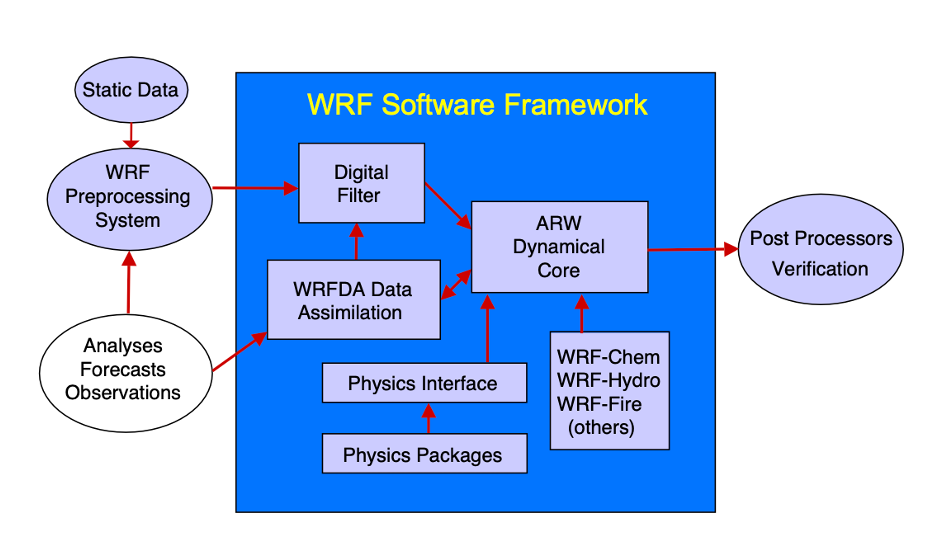
*<div align="center">Figure 1: ARW System Components (Skamarock et al)</div>*

First released in May 2018, some of the major features of the ARW Version 4 dynamics solver relating to the processes overviewed in class are highlighted below, taken from Skamarock et al.

>***ARW Dynamics Solver***

* Equations: Fully-compressible, Eulerian nonhydrostatic equations solver with a run-time hydrostatic option available. Conserves dry air mass and scalar mass. 
* Time Integration: Time-split integration using a 2nd- or 3rd-order Runge-Kutta scheme with 
smaller time step for acoustic and gravity-wave modes. Variable time step capability.
* Spatial Discretization: 2nd- to 6th-order advection options in horizontal and vertical.
* Turbulent Mixing and Model Filters: Sub-grid scale turbulence formulation in both coordinate and physical space. Divergence damping, external-mode filtering, vertically implicit 
acoustic step off-centering. Explicit filter option.
* Initial Conditions: Three dimensional for real-data, and one-, two- and three-dimensional for 
idealized data. Digital filtering initialization (DFI) capability available (real-data cases). * Lateral Boundary Conditions: Periodic, open, symmetric, and specified options available.
* Top Boundary Conditions: Gravity wave absorbing (diffusion, Rayleigh damping, or implicit 
Rayleigh damping for vertical velocity). Constant pressure level at top boundary along a 
material surface. Rigid lid option.
* Bottom Boundary Conditions: Frictional or free-slip.

Compressible, nonhydrostatic Euler equations are integrated into the ARW dynamics solver and cast in flux form using the variables that have conservation properties. The following equations represent the equations solved in the ARW (Skamarock et al):

>**Momentum equations:**

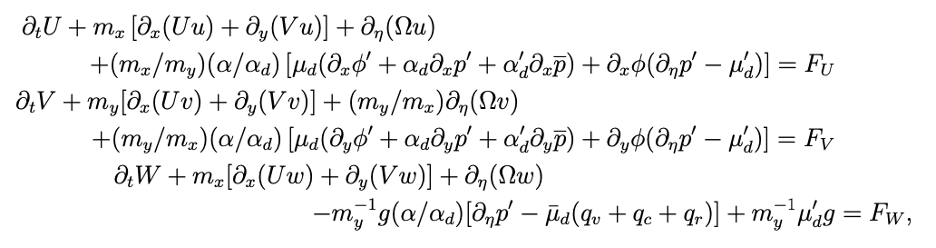

>**Mass conservation and geopotential equations:**

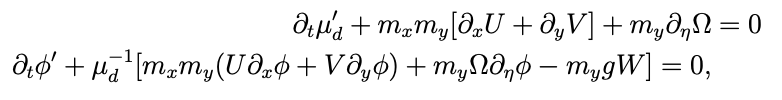

>**Diagnostic equation for dry hydrostatic pressure:**

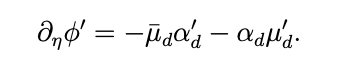

>**Equation of state:**

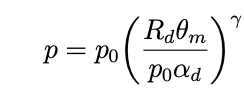

The WRF and specifically ARW model has been used in many applications similar and different to that of forecasting wind speed for the purpose of renewable energy. From 2007 to 2011, ARW was used in the real time tracking prediction of tropical cyclones over the north Indian Ocean. This study highlights the capabilities of the model over the study area, as well as “the continued need for operational forecasts from high-resolution models” (Osuri et al). ARW was also used to model wind speed as an investigative resource for a period of the Second Texas Air Quality Study in 2006 (Ngan et al). Both of these studies, as well as countless others, made use of the modeling of wind speed and used the resources of AWR to forecast potential hazardous situations. 

***
## III. Data Needs
***

User-defined initial conditions can be input to ARW for an idealized simulation. It can also be run using interpolated data from an external analysis or forecast for real-data cases. 2D and 3D cases are provided for idealized simulations. Table 1 below summarizes the names of the ARW ideal test cases that utilize various assumptions of idealized environments.

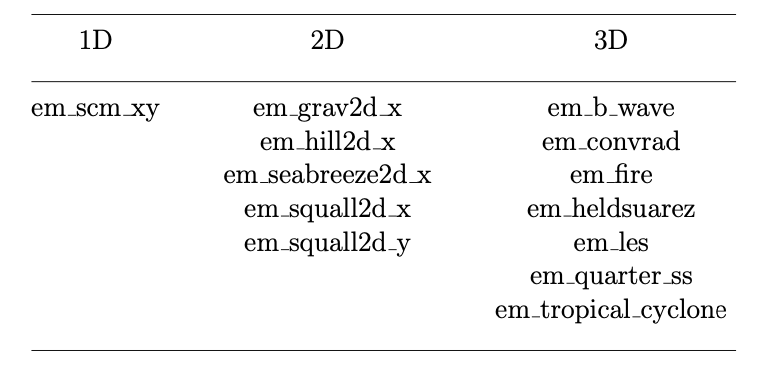

*<div align="center">Table 1: Ideal cases (Skamarock et al)</div>*

Initial conditions for real-data cases are pre-processed through a separate package call the WRF Preprocessing System (WPS). Figure 2 below is a schematic showing data flow and program components in WPS as it feeds initial data to ARW. 

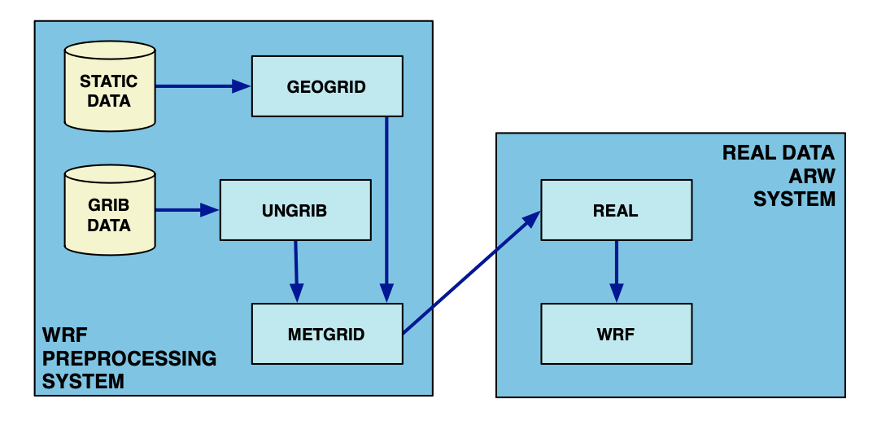

*<div align="center">Figure 2: Program components in WPS to initial data in ARW (Skamarock et al)</div>*

>**Input data to the ARW from WPS contains surface and 3D fields of:**

* Temperature (K)
* Relative humidity (%)
* Geopotential height (m)
* Pressure (Pa)
* Horizontal components of wind speed (m/s)

>**The 2D static terrestrial fields include:**

* Albedo
* Coriolis parameters
* Terrain elevation
* Vegetation/land use type
* Land/water mask
* Map scale factors
* Map rotation angle
* Soil texture category
* Vegetation greenness fraction
* Annual mean temperature
* Latitude/longitude

>**After WPS processing, the 2D time-dependent fields from the external model include:**

* Surface pressure and sea level pressure (Pa)
* Layers of soil temperature (K)
* Soil moisture (kg/kg)
* Snow depth (m)
* Skin temperature (K)
* Sea surface temperature (K)
* Sea ice flag

>**Several user-definable constants can be input for real-data cases:**

* *p*0 (105 Pa) reference sea level pressure
* T0 (usually 270 to 300 K) reference sea level temperature
* A (50 K) temperature difference between the pressure levels of *p*0 and *p*0/e 
* T_min (200 K) minimum temperature permitted
* γ_strat (-11 K) standard stratosphere lapse rate
* p_strat (0 Pa) pressure at which stratospheric warming begins

In simpler terms, the workflow of the WRF model thus takes input (extent, topography, land use, land over, soils, etc.), unpacks boundary condition data (subsets to spatial extent, interpolate data on domain boundary, interpolate data in time) and then feeds it to WRF. WRF then runs the model and writes the outputs. 

>**Outputs include:**

* Precipitation
* Temperature
* Humidity
* Wind field
* Radiation
* Land surface model

11 planetary boundary layers (PBL) schemes existed for use in the WRF-ARW core, version 3.5.1 model used in the Siuta et al study. A PBL is the scheme ultimately responsible for the simulated development of the planetary boundary layer, and for sub grid-scale fluxes of heat, momentum, and moisture in the model. In this study, the Global Forecast System (GFS) and North American Mesoscale (NAM) models were used for the initial conditions. For a brief compare and contrast of the datasets, GFS- initialized WRF runs used the 0000 UTC GFS output at 0.58 resolution, while NAM-initialized WRF runs used 0000 UTC 32-km NAM output. 

***
## IV. Calibration
***

Adjusting the model parameters to match the model output to the observations is the process of calibration. Specific to the WRF model used in the identified problem of wind forecasting for renewable energy, several researchers have attempted to calibrate the WRF model parameters to improve model performance in recent years. They recommend a two-step approach to be followed. First, a sensitivity analysis to screen for the most influential parameters. Second, these parameters must be calibrated with respect to the fundamental meteorological variables (Chinta et al).

In the Siuta et al study evaluating the sensitivity of wind turbine hub-height wind speed forecasts to the PBL, grid length, and initial conditions selection over complex terrain, several improvements in forecast accuracy were realized based on how the model was calibrated. The selection of the grid length or PBL scheme choice was the primary dependent factor. However, the most important factor varied by location, season, time of day, and bias correction application. When aggregated over all the locations chosen for this study, the Asymmetric Convective Model, version 2 (ACM2) PBL scheme provided the best forecast accuracy. In other words, using this scheme to calibrate the model proved the most accurate results.

The ACM2 PBL scheme is a combination nonlocal transilient turbulence scheme. It exists under unstable conditions with local eddy diffusivity in stable conditions. The contribution of the total mixing from nonlocal and local components is controlled by a stability parameter. Local K theory controls the downward mixing. A critical bulk Richardson number is used to determine the PBL height. The calibration of other data such as temperature, humidity, and pressure all influence wind speed forecasting and can be adjusted in the WPS processing system for improved results (Siuta et al).

***
## V. Numerical Experiment Design
***

In the study conducted by Siuta et al, the processes used during data assimilation for the GFS and NAM are similar. This is because they are both produced by the same agency. If we were to initialize WRF with other initial condition sources, this could result in a larger sensitivity to initial condition choices than has been shown in this study. Other sources of initial conditions could include the Fleet Numerical Meteorology and Oceanography Center Navy Global Environmental Model (NAVGEM), Met Office Unified Model (UKMO), or Canadian Global Deterministic Prediction System (GDPS). The steps for the experiment could then mirrow those used in the Siuta et al study from 2017, briefly described below. 

48 forecasts per day for 1 year (June through May) would be conducted using different initial condition sources, horizontal grid lengths, and PBL schemes. The eight available PBL schemes (perhaps there are more available now with later available versions of the software) would be each used in 16 daily WRF models. Wind farm locations and observed values were confidential information during the previous study so this information is unknown, but the new experiment would aim to be ran again at the same locations and same hub-heights, depending on the wind site. Information collection and biased correction would also be applied in the same way in an attempt to purely study the effects of changing the initial condition sources.

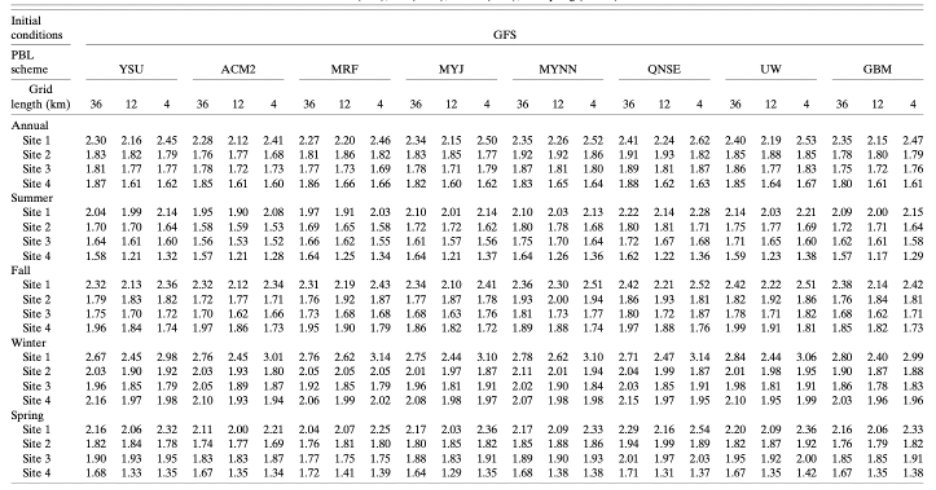

*<div align="center">Table 2: MAE Data Table Set Up (Skamarock et al)</div>*

Creating a table like the one shown above that was formed during the Siuta et al 2017 study would be helpful in organizing the new study that employs the use of different initial condition sources. This table would detail mean absolute error (MAE) in meters per second for each of the bias-corrected forecast initialized using the chosen initial condition source. Mean absolute error is a measure of error between paired observations expressing the same phenomenon. Other forms of short-term deterministic forecast performance metrics include root-mean-square error (RMSE) and the linear correlation coefficient, *r*. Sites 1-4 are the anonymous wind farm locations. Statistics are divided into five blocks: annual, summer, fall, sinter, and spring. Clearly seeing this error helps to determine the best forecasts. The best forecasts will have a small MAE, meaning they have high accuracy.

Running the study the exact same way and only changing the initial condition sources would serve to both extend and enhance the previous experiment. This increased diversity in initial condition sources input into WRF could attempt to further determine if the effects of the PBL scheme choice and grid length contribute more to differences in the biased-corrected forecast accuracy than the initial condition choice. Improved or worsened data predictions would allow more initial condition sources to be rated in terms of accuracy and desirability to wind forecasting. 

When we are better able to forecast wind patterns and predictions, power can be adjusted to continually match electrical demand. Spinning and standby reserves add flexibility to the electrical grid in the sense that they are available to add power to the grid at short notice to account for the variable nature of wind. These reserve resources require spinup time ranging from hours to days, so the more accurate the short-term wind forecasting, the more efficient reserve resource planning. Improved scheduling of reserve power can also result in improved market trading opportunities and overall better planning for the future.

***
## VI. References
***

Chinta, Sandeep & Balaji, Chakravarthy. "Calibration of WRF model parameters using multiobjective adaptive surrogate model‑based optimization to improve the prediction of the Indian summer monsoon”. Climate Dynamics (2020). 55. 10.1007/s00382-020-05288-1.

Ngan, Fong, Hyuncheol Kim, Pius Lee, Khalid Al-Wali, and Bright Dornblaser. "A Study of Nocturnal Surface Wind Speed Overprediction by the WRF-ARW Model in Southeastern Texas". Journal of Applied Meteorology and Climatology52.12 (2013): 2638-2653. < https://doi.org/10.1175/JAMC-D-13-060.1>. Web. 11 Dec. 2021.

Osuri, Krishna K., U. C. Mohanty, A. Routray, M. Mohapatra, and Dev Niyogi. "Real-Time Track Prediction of Tropical Cyclones over the North Indian Ocean Using the ARW Model". Journal of Applied Meteorology and Climatology52.11 (2013): 2476-2492. < https://doi.org/10.1175/JAMC-D-12-0313.1>. Web. 11 Dec. 2021.

R. M. A. Feroz and A. Javed. "Forecasting of Wind Resources Using the Weather Research and Forecasting Software," 2021 International Bhurban Conference on Applied Sciences and Technologies (IBCAST), 2021, pp. 726-729, doi: 10.1109/IBCAST51254.2021.9393212.

Siuta, David, Gregory West, and Roland Stull. " WRF Hub-Height Wind Forecast Sensitivity to PBL Scheme, Grid Length, and Initial Condition Choice in Complex Terrain". Weather and Forecasting 32.2 (2017): 493-509. <https://doi.org/10.1175/WAF-D-16-0120.1>. Web. 11 Dec. 2021.

Skamarock, W. C., Klemp, J. B., Dudhia, J., Gill, D. O., Liu, Z., Berner, J., … Huang, X. -yu. (2021). "A Description of the Advanced Research WRF Model Version 4.3". doi:10.5065/1dfh-6p97